In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import xarray as xr
from tqdm import tqdm
from scipy.constants import c
from interleaver_2_stages import interleaver_2_stage_calc, calculate_spectrum_bandwidth

In [2]:
gf45clo_pdk_sin_neff_ng_variability = pd.read_csv("gf45clo_pdk_sin_neff_ng_variability.csv")
gf45clo_sin_neff_ng_variability = gf45clo_pdk_sin_neff_ng_variability[
    (gf45clo_pdk_sin_neff_ng_variability['rand_wg_width']==True) & 
    (gf45clo_pdk_sin_neff_ng_variability['rand_wg_height']==True) & 
    (gf45clo_pdk_sin_neff_ng_variability['rand_wg_sidewall_angle']==True) & 
    (gf45clo_pdk_sin_neff_ng_variability['wg_width (nm)']<1.5)
]

In [3]:
XPS_first_stage_loss_dB   = 0.07
XPS_second_stage_loss_dB  = 0.07
XPS_third_stage_loss_dB   = 0.07
SiN_propagation_loss_dB_m = 40
SiN_directional_coupler_loss_dB = 0.01

SiN_group_index = np.median(gf45clo_sin_neff_ng_variability['ng_freq0'].values)
SiN_effective_index = np.median(gf45clo_sin_neff_ng_variability['neff_freq0'].values)
center_wavelength = 1310e-9
freq = c/(center_wavelength)
FSR_wavelength = 1600e9 * (center_wavelength)**2/(c)
channel_spacing = FSR_wavelength/8
channel1_wavelength = center_wavelength - 3.5*channel_spacing
channel2_wavelength = center_wavelength - 2.5*channel_spacing
channel3_wavelength = center_wavelength - 1.5*channel_spacing
channel4_wavelength = center_wavelength - 0.5*channel_spacing
channel5_wavelength = center_wavelength + 0.5*channel_spacing
channel6_wavelength = center_wavelength + 1.5*channel_spacing
channel7_wavelength = center_wavelength + 2.5*channel_spacing
channel8_wavelength = center_wavelength + 3.5*channel_spacing
channel_wavelength_array = [
    channel1_wavelength,
    channel2_wavelength,
    channel3_wavelength,
    channel4_wavelength,
    channel5_wavelength,
    channel6_wavelength,
    channel7_wavelength,
    channel8_wavelength,
]
dL_1600Ghz_FSR = (center_wavelength)**2/(SiN_group_index * FSR_wavelength)
dL_800Ghz_FSR = (center_wavelength)**2/(SiN_group_index * FSR_wavelength/2)
dL_400Ghz_FSR = (center_wavelength)**2/(SiN_group_index * FSR_wavelength/4)

optimization_wavelength_sweep = np.linspace(1295e-9,1325e-9,num=4000)
random_variable_sigma = 0.04
cost_function_plot_alpha = 0.3
bounds_epsilon = 5e-3

dL for 400Ghz FSR:  0.00038810533884040785
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.630000    0.900000   -0.859956 -2.107089  3070.893770
  10    0.495000    0.635000    0.895200   -0.917745 -2.248685  2909.354464
  20    0.504697    0.625000    0.897192   -1.094872 -2.907824  2342.270604
  30    0.495000    0.630489    0.903099   -2.029987 -4.768233  1249.904178
  40    0.499027    0.629350    0.897837   -1.980476 -4.407633  1133.255169
  50    0.497278    0.630486    0.895000   -1.921019 -3.792190  1191.152697
  60    0.495029    0.635000    0.895000   -2.147895 -4.126242  1086.713331
  70    0.497516    0.632409    0.895864   -2.224314 -4.411609  1082.477309
  80    0.495528    0.632865    0.895403   -2.118431 -4.270253  1072.750375
  90    0.496190    0.632875    0.895247   -2.154478 -4.299876  1072.212344
 100    0.495918    0.632719    0.895327   -2.136853 -4.276059  1072.087589
 110    0.495952    0.632830    0.895302   -2.140936 -

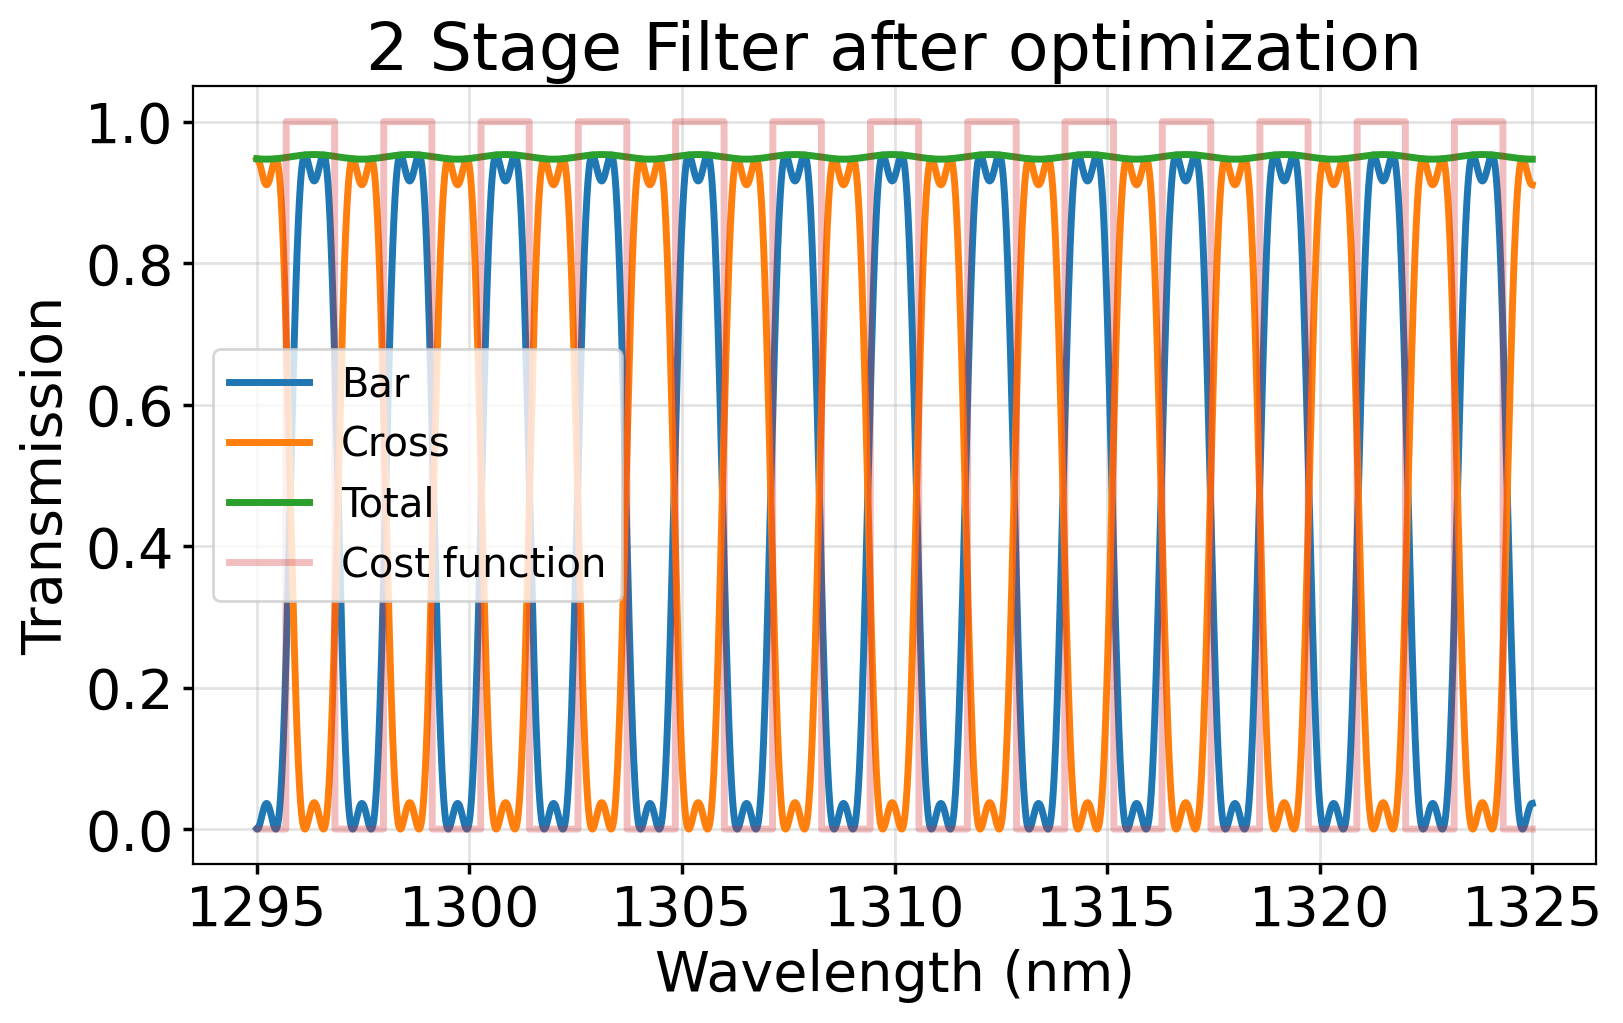

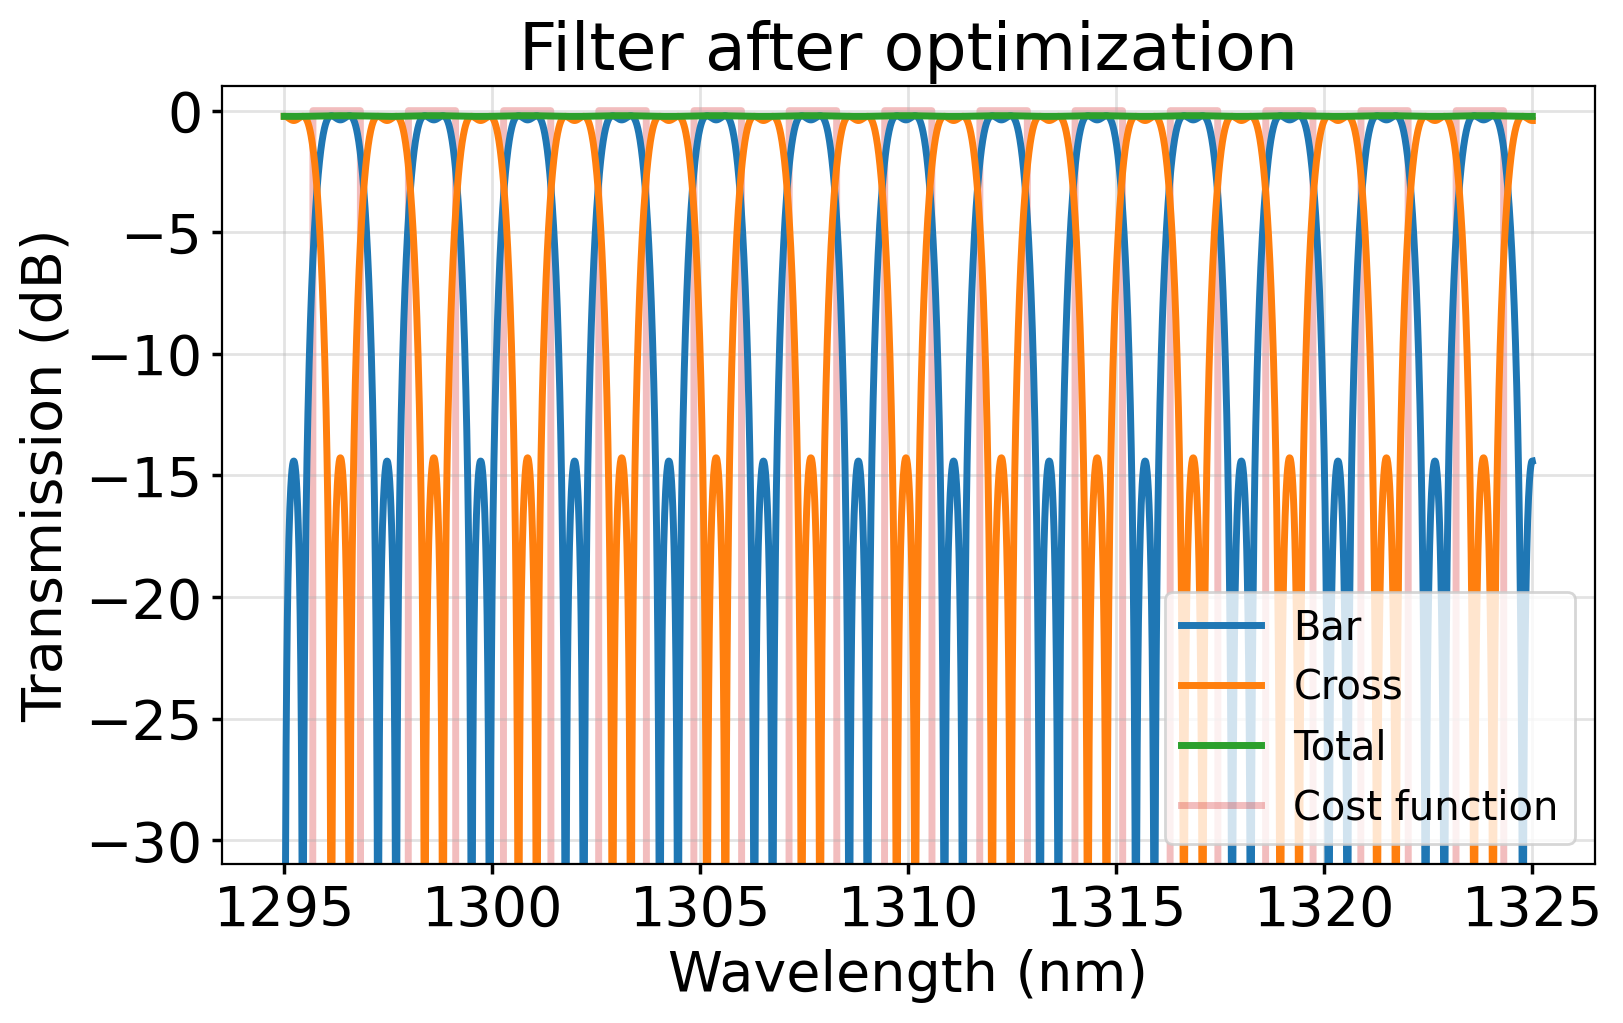

In [4]:
# Create compound effect of the three filter stages on top of each other
print("dL for 400Ghz FSR: ", dL_400Ghz_FSR)
um = 1e-6

interleaver_400Ghz_FSR = interleaver_2_stage_calc(
    L = 350*um,
    dL1 = dL_400Ghz_FSR,
    dL2 = 2*dL_400Ghz_FSR,
    dc1 = 0.5,
    dc2 = 0.63,
    dc3 = 0.9,
    effective_index = np.median(gf45clo_sin_neff_ng_variability['neff_freq0'].values),
    group_index = np.median(gf45clo_sin_neff_ng_variability['ng_freq0'].values),
    
)
interleaver_400Ghz_FSR.channel_spacing = FSR_wavelength/8

interleaver_400Ghz_result = interleaver_400Ghz_FSR.minimize_cost_function(random_dc=False,random_phase=True,printy=True)

wav,bar_port_amp,cross_port_amp = interleaver_400Ghz_FSR.calculate_spectrum(*interleaver_400Ghz_result.x)

print("First stage insertion loss (dB): ", np.max(10*np.log10(bar_port_amp)))

interleaver_400Ghz_FSR.plot_spectrum(interleaver_400Ghz_result)

dL for 400Ghz FSR:  0.00038810533884040785
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.370000    0.900000   -1.383477  1.874311  2093.557848
  10    0.495000    0.365232    0.901032   -1.497365  2.028604  1872.884772
  20    0.495000    0.365147    0.899014   -1.857341  1.946178  1458.305336
  30    0.495492    0.365574    0.897282   -2.200518  2.102992  1357.356430
  40    0.496003    0.366791    0.898090   -2.171200  2.048260  1346.192972
  50    0.495916    0.366063    0.901239   -2.190279  2.008990  1345.268074
  60    0.495715    0.365806    0.905000   -2.134218  1.926684  1341.503325
  70    0.495000    0.368754    0.904977   -2.185663  1.951011  1335.942204
  80    0.495000    0.372118    0.905000   -2.183874  1.944024  1329.127506
  90    0.495140    0.375000    0.904878   -2.176229  1.974535  1321.958772
 100    0.495427    0.375000    0.904737   -2.153157  2.007113  1320.583425
 110    0.495575    0.375000    0.904732   -2.148125  

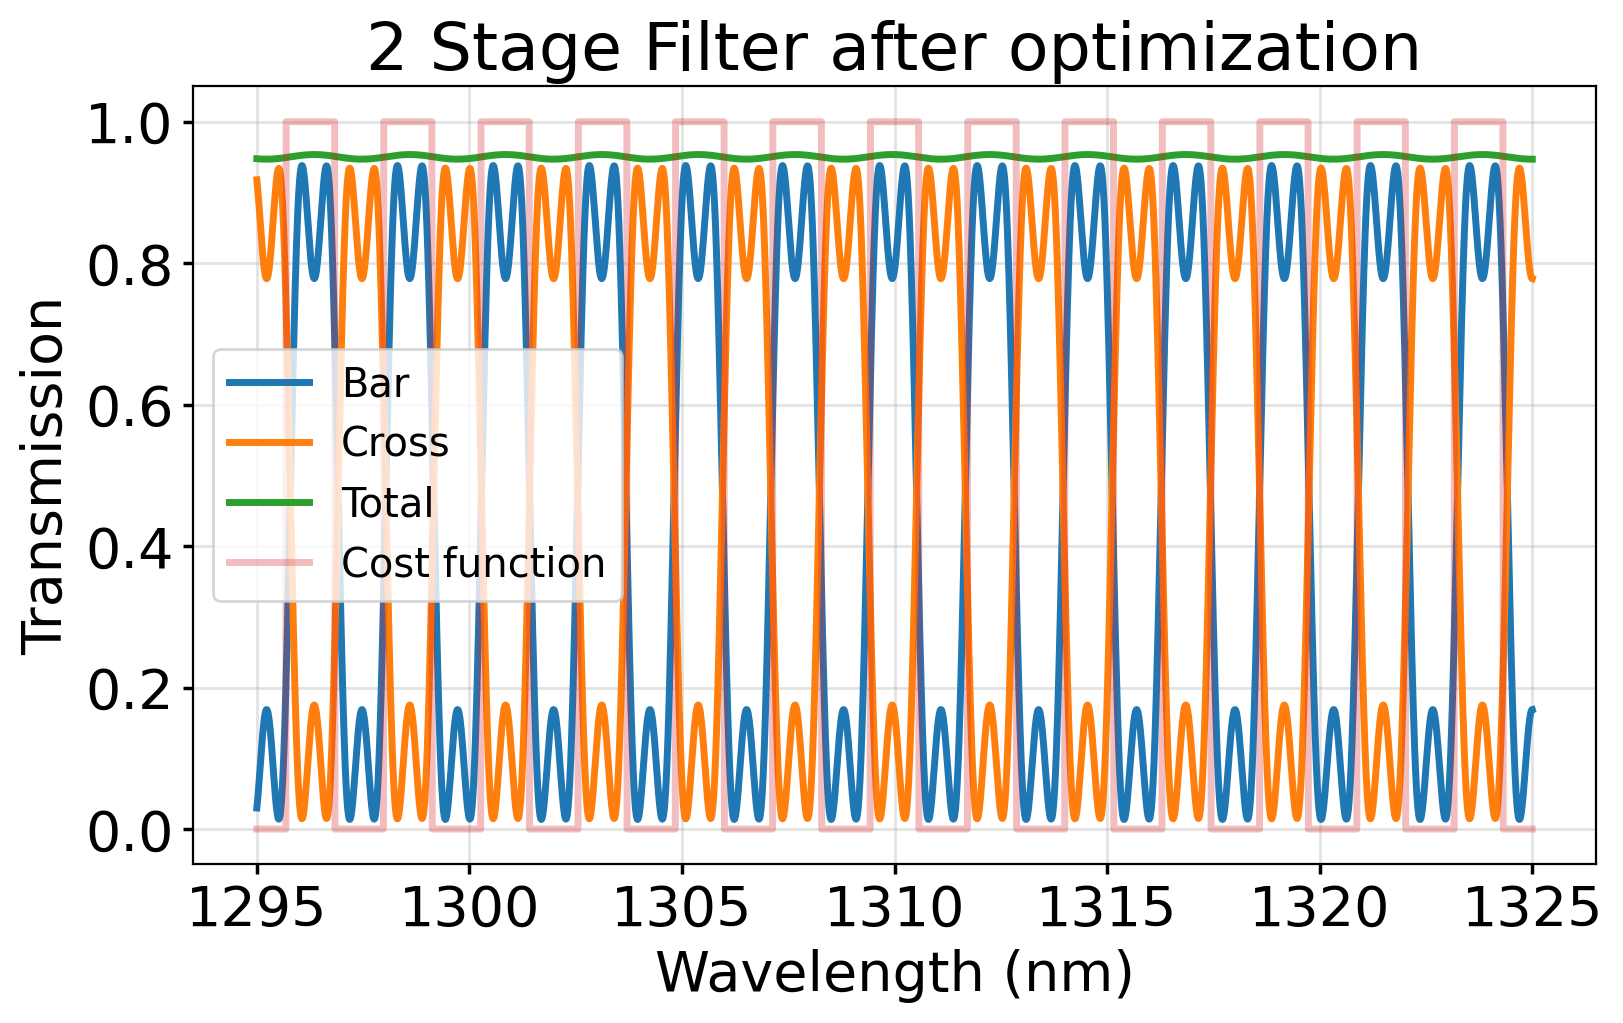

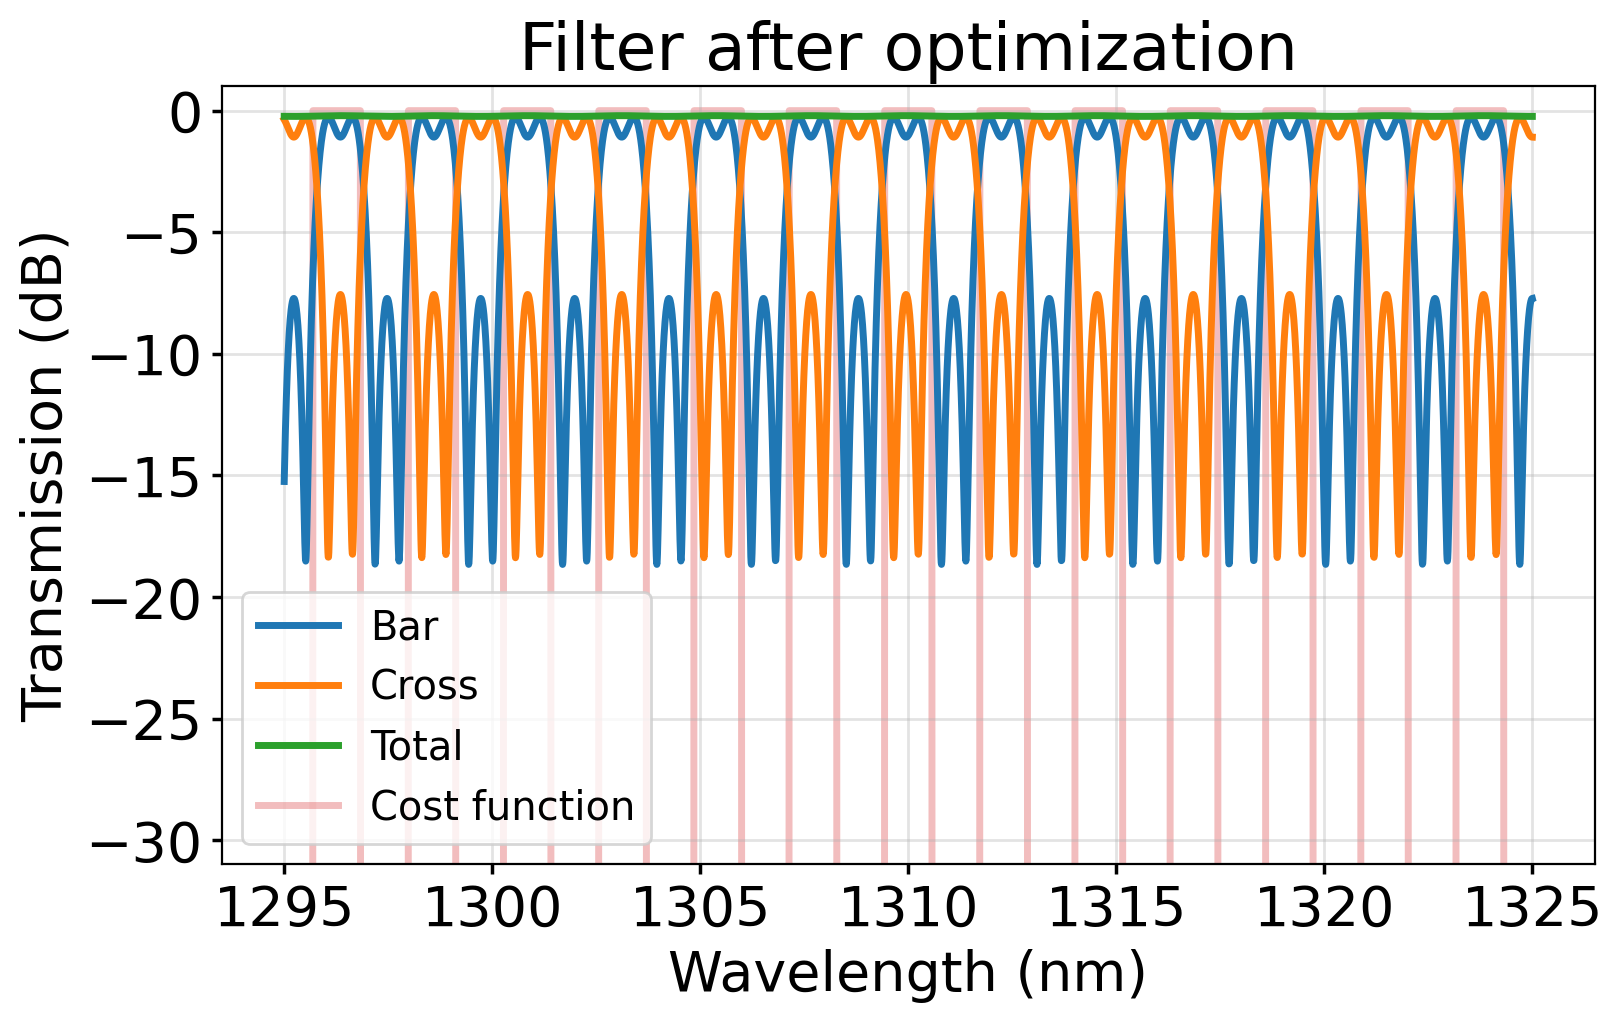

In [5]:
# Create compound effect of the three filter stages on top of each other
print("dL for 400Ghz FSR: ", dL_400Ghz_FSR)
um = 1e-6

interleaver_400Ghz_FSR = interleaver_2_stage_calc(
    L = 350*um,
    dL1 = dL_400Ghz_FSR,
    dL2 = 2*dL_400Ghz_FSR,
    dc1 = 0.5,
    dc2 = 1.0-0.63,
    dc3 = 0.9,
    effective_index = np.median(gf45clo_sin_neff_ng_variability['neff_freq0'].values),
    group_index = np.median(gf45clo_sin_neff_ng_variability['ng_freq0'].values),
    
)
interleaver_400Ghz_FSR.channel_spacing = FSR_wavelength/8

interleaver_400Ghz_result = interleaver_400Ghz_FSR.minimize_cost_function(random_dc=False,random_phase=True,printy=True)

wav,bar_port_amp,cross_port_amp = interleaver_400Ghz_FSR.calculate_spectrum(*interleaver_400Ghz_result.x)

print("First stage insertion loss (dB): ", np.max(10*np.log10(bar_port_amp)))

interleaver_400Ghz_FSR.plot_spectrum(interleaver_400Ghz_result)

dL for 400Ghz FSR:  0.00038810533884040785
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.370000    0.100000    2.972894  2.349659  4534.786862
  10    0.505000    0.371472    0.105000    2.739819  2.339132  4289.976905
  20    0.498928    0.375000    0.104573    1.039050  2.314818  2950.444007
  30    0.498797    0.375000    0.101927    0.587065  2.442962  2923.106255
  40    0.505000    0.375000    0.100502    1.169770  2.664218  2830.667670
  50    0.504084    0.375000    0.096151    1.176944  2.734820  2767.602300
  60    0.502269    0.375000    0.095000    0.630486  3.686235  2059.237401
  70    0.502202    0.375000    0.095000    1.446600  3.450558  2507.203954
  80    0.499679    0.375000    0.095000    0.655695  4.821075  1487.523278
  90    0.497518    0.375000    0.095000    0.968656  5.417509  1352.476543
 100    0.498460    0.375000    0.095000    1.070606  5.064953  1330.910848
 110    0.498485    0.375000    0.095000    1.037045  

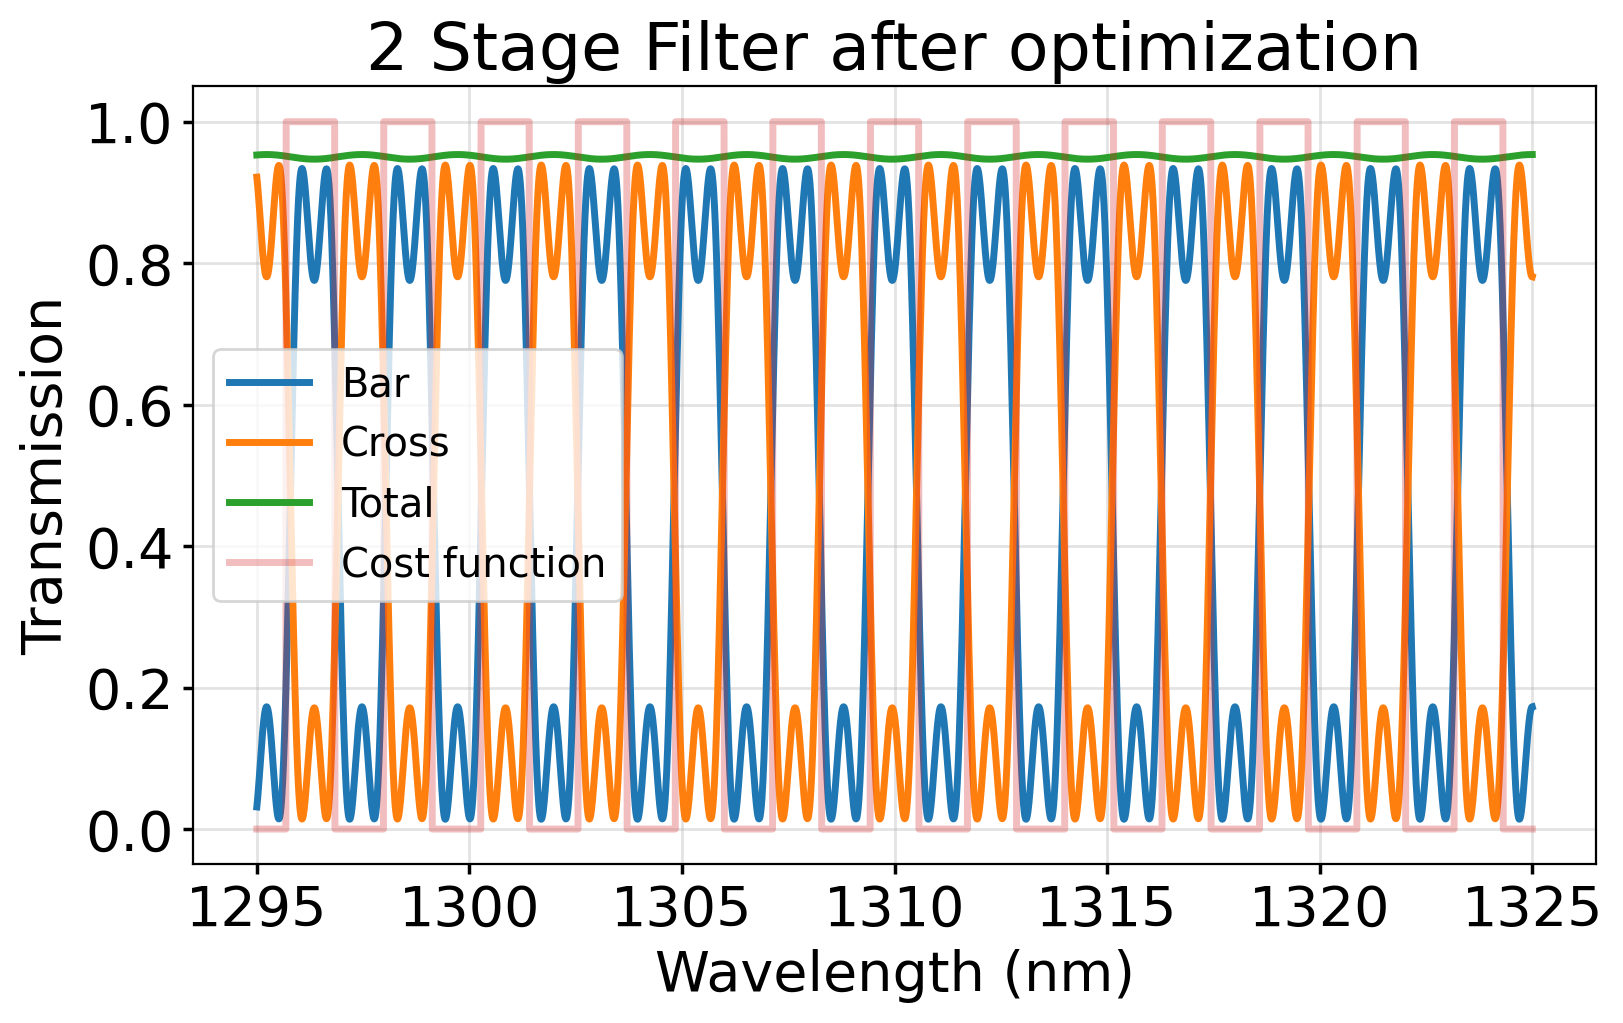

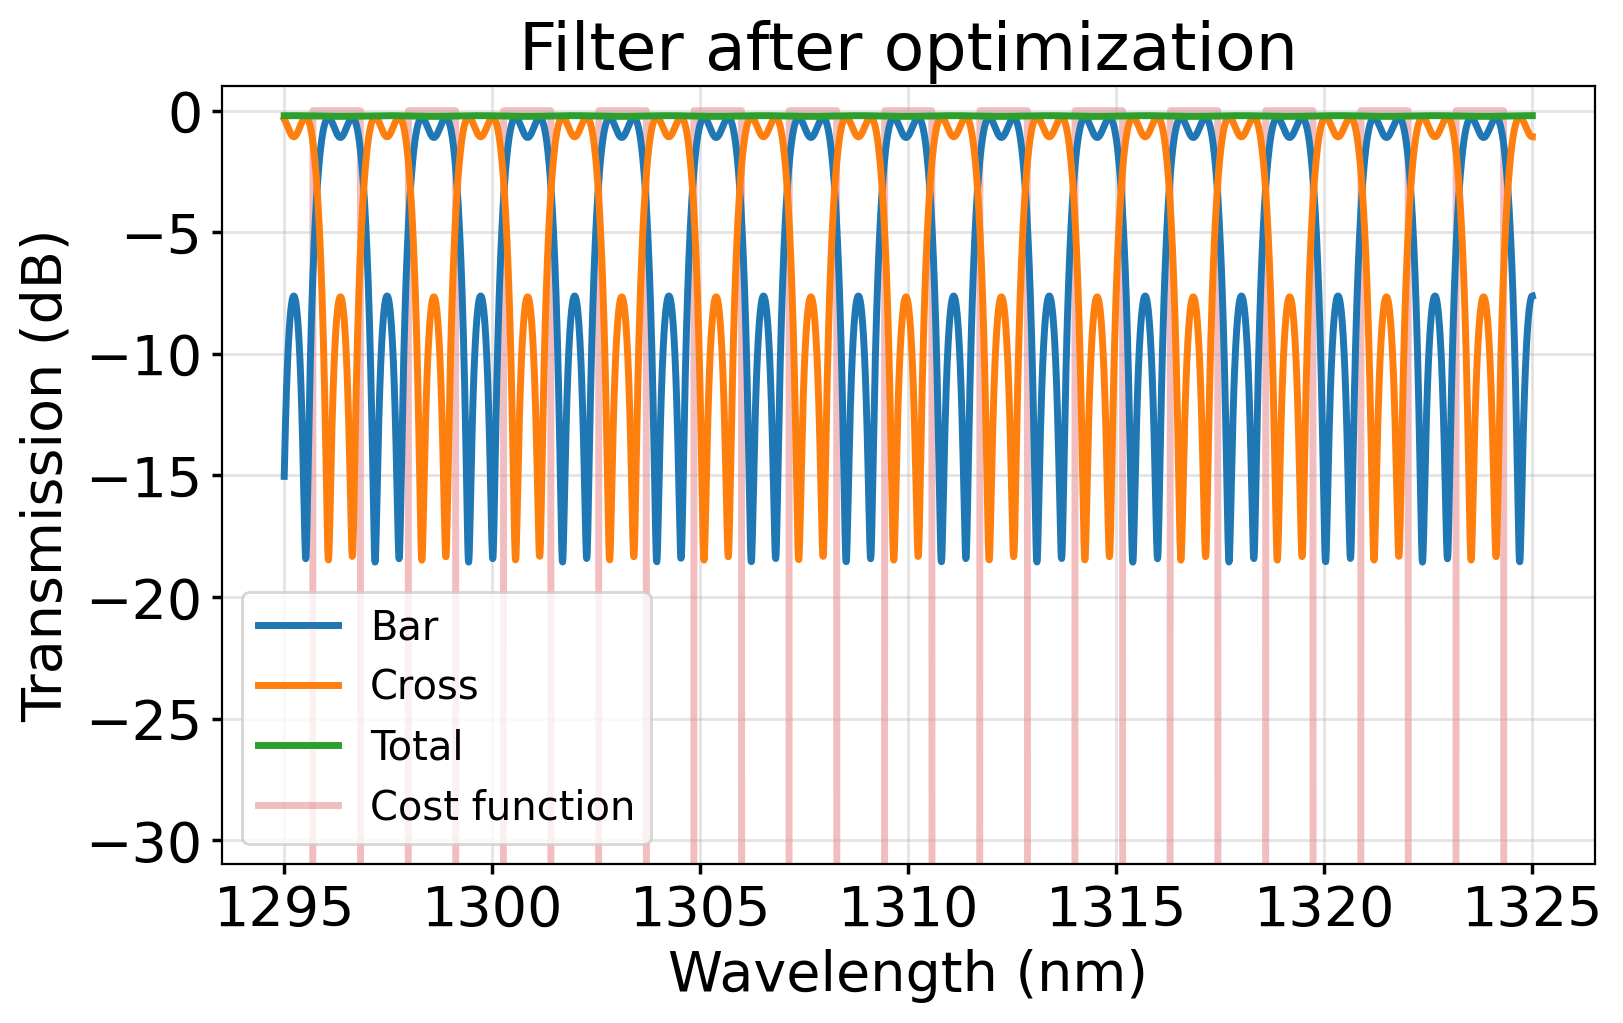

In [6]:
# Create compound effect of the three filter stages on top of each other
print("dL for 400Ghz FSR: ", dL_400Ghz_FSR)
um = 1e-6

interleaver_400Ghz_FSR = interleaver_2_stage_calc(
    L = 350*um,
    dL1 = dL_400Ghz_FSR,
    dL2 = 2*dL_400Ghz_FSR,
    dc1 = 0.5,
    dc2 = 1.0-0.63,
    dc3 = 1-0.9,
    effective_index = np.median(gf45clo_sin_neff_ng_variability['neff_freq0'].values),
    group_index = np.median(gf45clo_sin_neff_ng_variability['ng_freq0'].values),
    
)
interleaver_400Ghz_FSR.channel_spacing = FSR_wavelength/8

interleaver_400Ghz_result = interleaver_400Ghz_FSR.minimize_cost_function(random_dc=False,random_phase=True,printy=True)

wav,bar_port_amp,cross_port_amp = interleaver_400Ghz_FSR.calculate_spectrum(*interleaver_400Ghz_result.x)

print("First stage insertion loss (dB): ", np.max(10*np.log10(bar_port_amp)))

interleaver_400Ghz_FSR.plot_spectrum(interleaver_400Ghz_result)